# 支撐向量回歸(Support Vector Regression)

##### 先引入我們需要的packages

In [1]:
import os
import numpy as np
import random
import math
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Generate data point

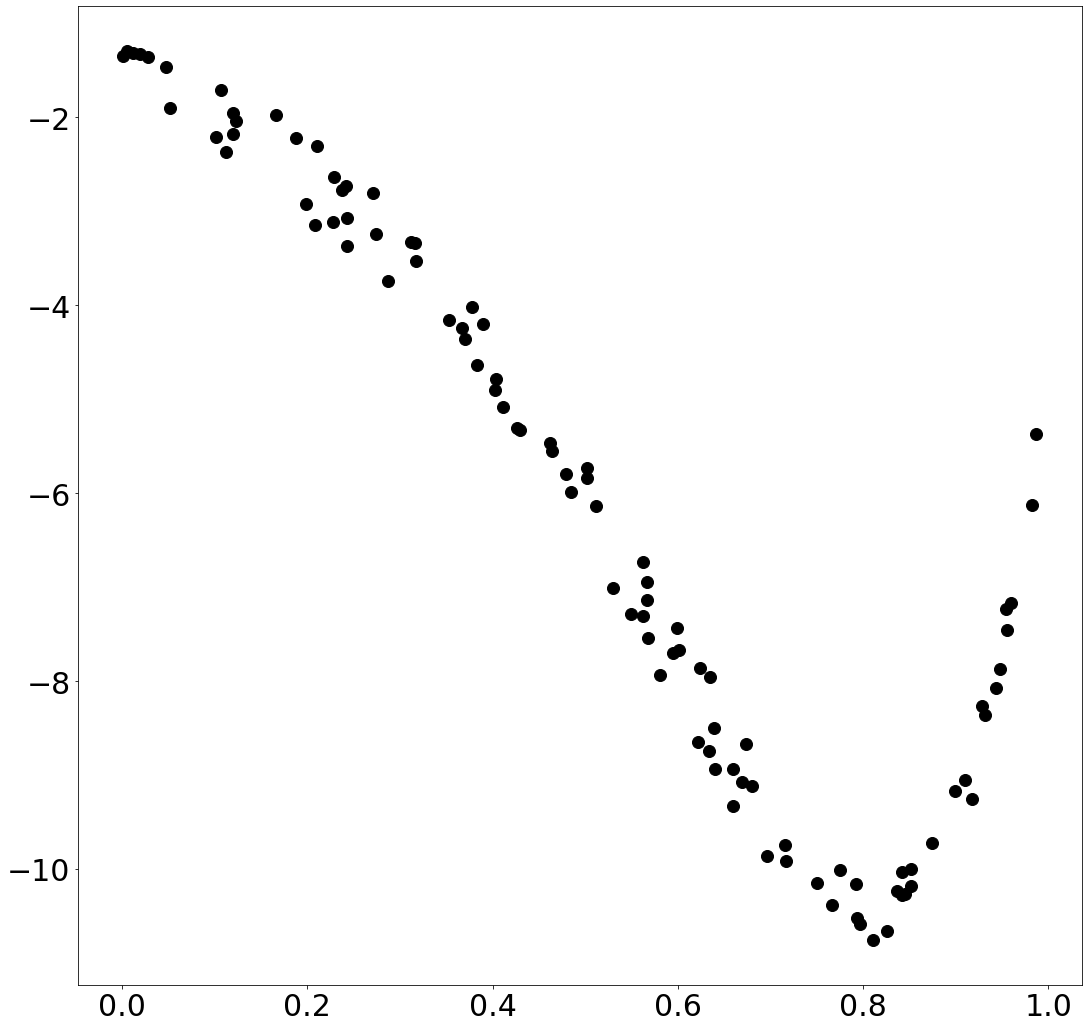

In [2]:
# p0~p9代表0次到9次方
p9,p8,p7,p6,p5,p4,p3,p2,p1,p0=1,3,5,7,9,-10,-8,-6,-4,-2
x=np.zeros(100)
y=np.zeros(100)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*1
power=[p9,p8,p7,p6,p5,p4,p3,p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Polynomial Kernel

In [3]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    return (zeta+gamma*np.outer(x,xx))**power

# Kernel Ridge Regression

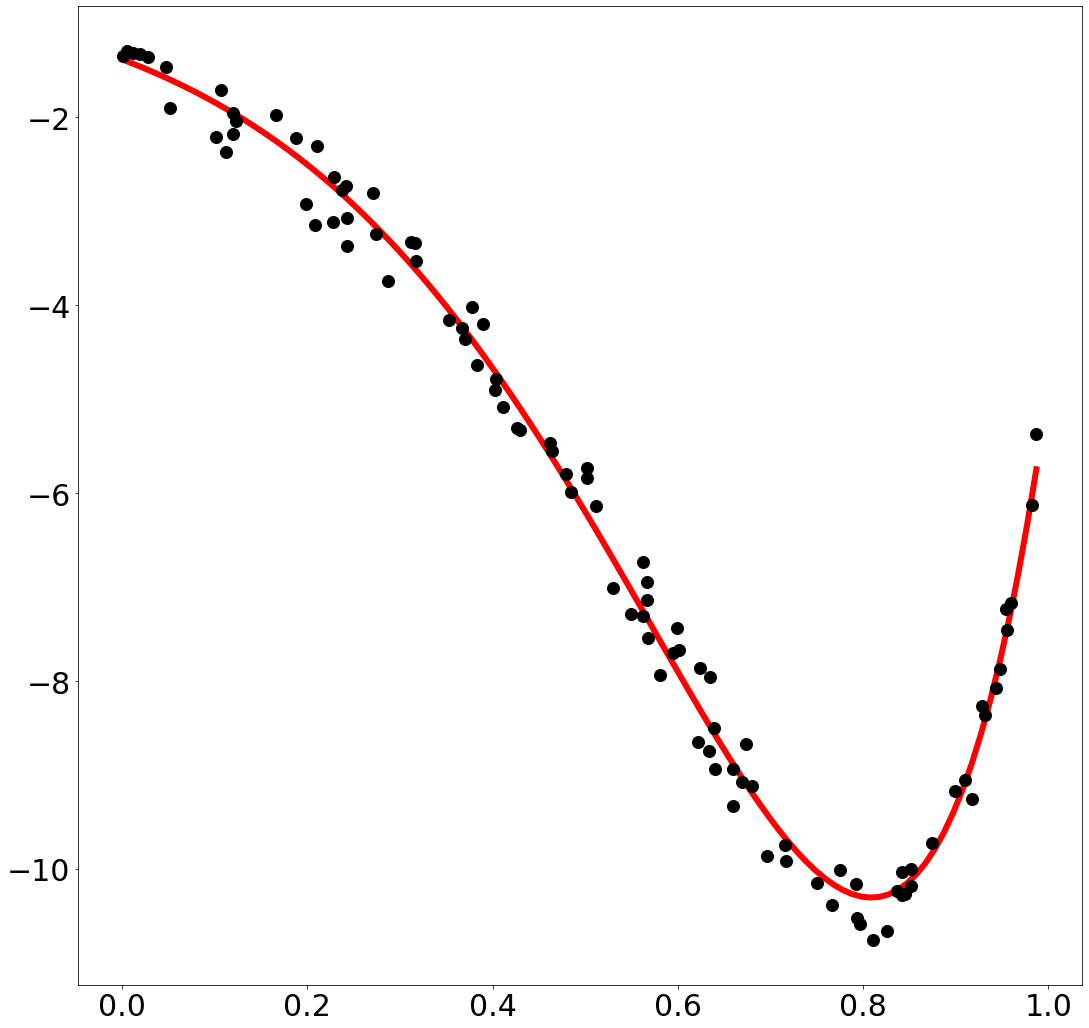

In [4]:
N=100
# c為次方數
c=9
# Polynomail Kernel 參數
gamma=1
zeta=1
# Regularization參數
lambda_2=1
# Kernel Trick
K=Polynomial_kernel(x,x,c,gamma,zeta)
# 計算alpha，可比對公式
a=np.dot(np.linalg.inv(lambda_2*np.diag(np.ones(N))+K),y)
# 建立回歸線數據點
x_plot=np.linspace(min(x),max(x),100)
K_plot=Polynomial_kernel(x_plot,x,c,gamma,zeta)
y_pred_krr=np.dot(K_plot,a)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_plot,y_pred_krr,"r-",linewidth=6)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Support Vector Regression

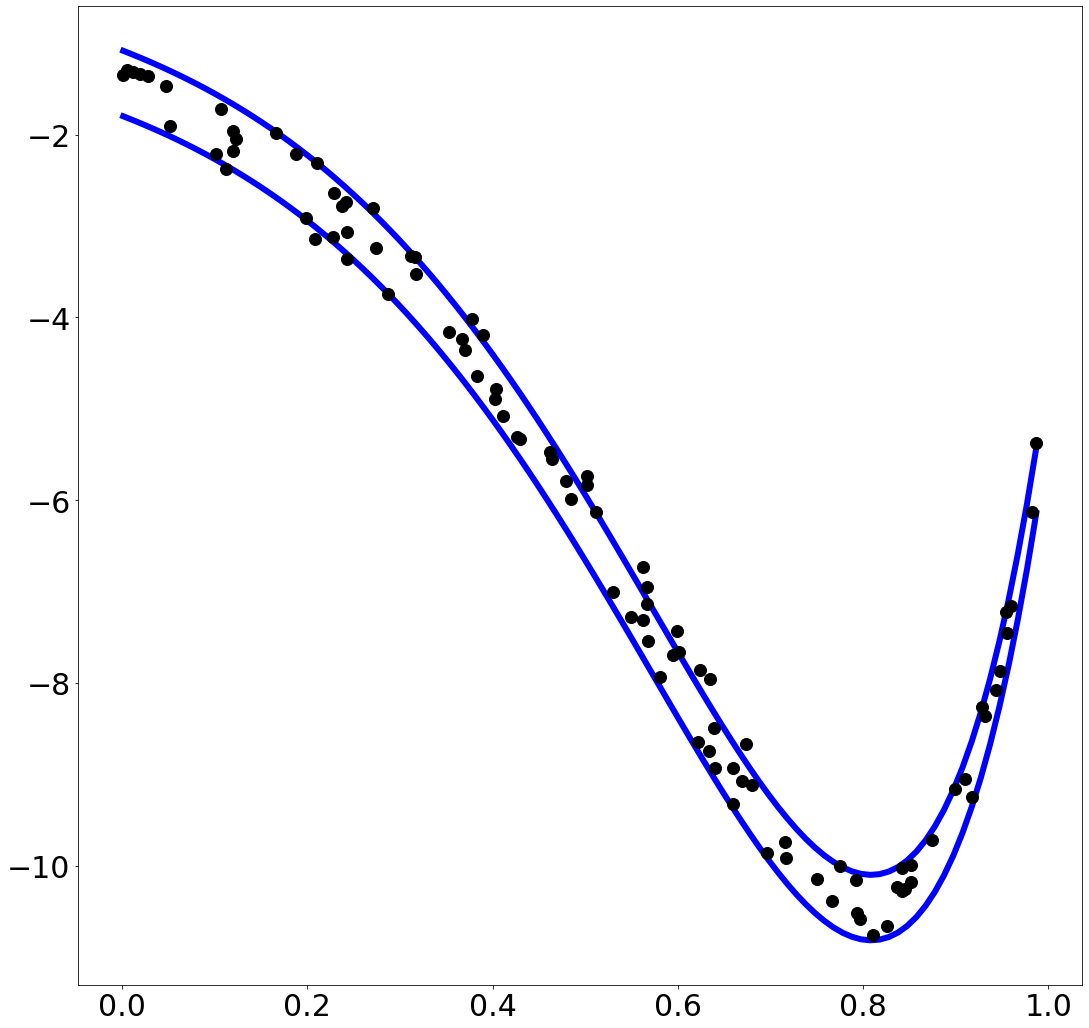

In [5]:
N=100
# c為次方數
c=9
gamma=1
zeta=1
t=0.05
CC=1
# 二次規劃(可比照公式)
Q = cvxopt.matrix(np.concatenate([np.concatenate([K,-K],axis=0),np.concatenate([-K,K],axis=0)],axis=1))
p = cvxopt.matrix(np.concatenate([np.ones(N)*t-y,np.ones(N)*t+y]),(2*N,1))
G = cvxopt.matrix(np.concatenate([np.diag(np.ones(2*N)* 1.),np.diag(np.ones(2*N)* -1.)]))
h = cvxopt.matrix(np.concatenate([CC*np.ones(2*N),np.zeros(2*N)]))
A = cvxopt.matrix(np.concatenate([np.ones(N),-np.ones(N)]),(1,2*N))
b = cvxopt.matrix(0.0)
# 利用cvxopt套件求解
cvxopt.solvers.options['show_progress'] = False
cvxopt.solvers.options['abstol'] = 1e-10
cvxopt.solvers.options['reltol'] = 1e-10
cvxopt.solvers.options['feastol'] = 1e-10
# 求出alpha值
a=np.array(cvxopt.solvers.qp(Q, p, G, h, A, b)['x']).flatten()
# a(U)-a(D)
aa=a[:N]-a[N:2*N]
# 找出上界support vector
for i in range(0,N):
    if(a[i]>10**-6):
        U_SV=i
        break
# 找出下界support vector
for i in range(N,2*N):
    if(a[i]>10**-6):
        D_SV=i
        break
# 計算上界回歸線邊界
Com=0
for i in range(0,N):
    if(abs(aa[i])>1e-6):
        Com+=aa[i]*K[i,U_SV]
b=y[U_SV]-Com
y_pred_svr_U=np.dot(K_plot,aa)+b
# 計算下界回歸線邊界
Com=0
for i in range(0,N):
    if(abs(aa[i])>1e-6):
        Com+=aa[i]*K[i,D_SV-N]
b=y[D_SV-N]-Com
y_pred_svr_D=np.dot(K_plot,aa)+b
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_plot,y_pred_svr_U,"b-",linewidth=6)
plt.plot(x_plot,y_pred_svr_D,"b-",linewidth=6)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# KRR vs SVR

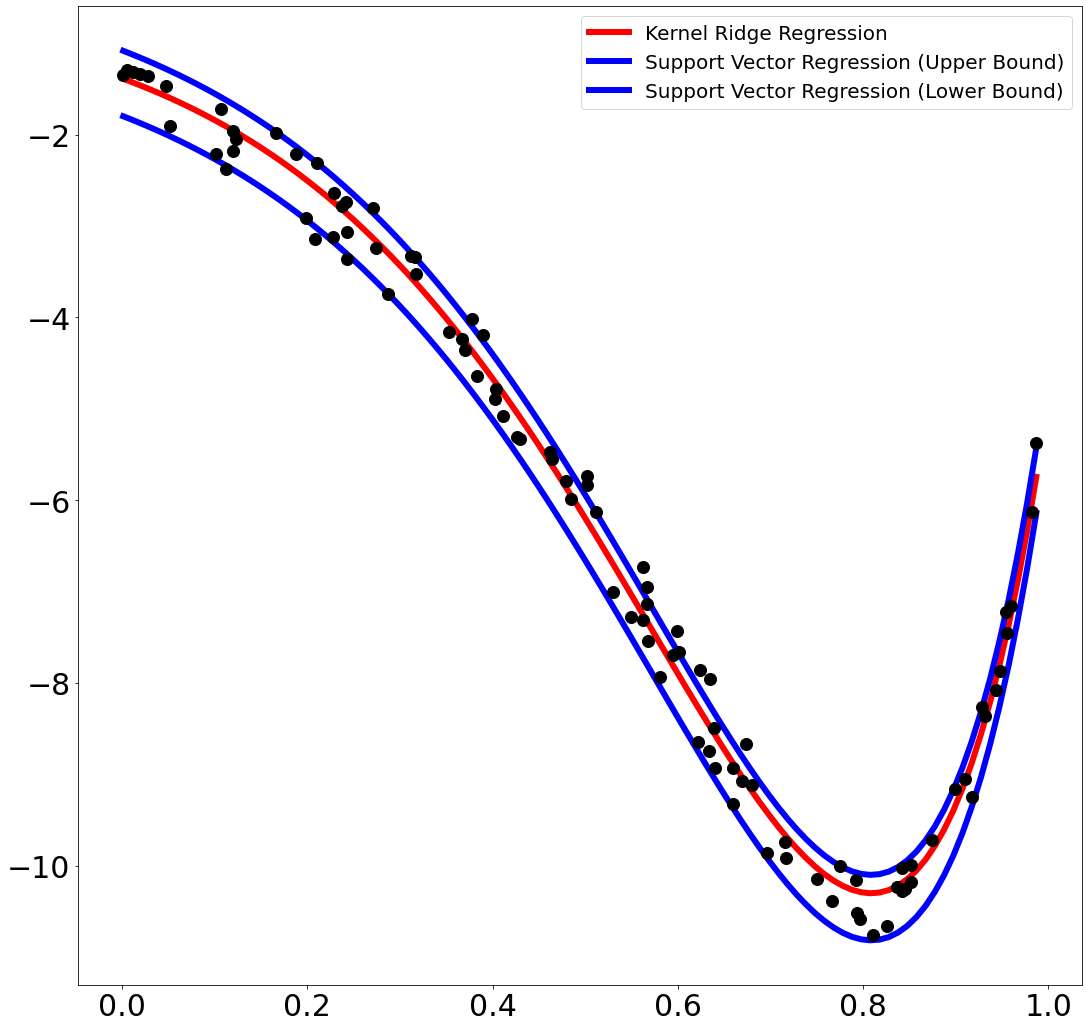

In [6]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_plot,y_pred_krr,"r-",linewidth=6,label="Kernel Ridge Regression")
plt.plot(x_plot,y_pred_svr_U,"b-",linewidth=6,label="Support Vector Regression (Upper Bound)")
plt.plot(x_plot,y_pred_svr_D,"b-",linewidth=6,label="Support Vector Regression (Lower Bound)")
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()